---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo ciclo del 2022

---

[comment]: <> (Modificar esta sección con datos personales)

* Estudiante: **Nombre completo de estudiante**
* Carné: **D12345**
* Grupo: **1/2/3**

# `P3` - *Variables aleatorias múltiples*

> Este es un ejercicio de análisis y modelado probabilístico de variables aleatorias múltiples con las herramientas de programación y cálculo numérico de Python.

**Nota**: Es recomendable revisar el tutorial `Py6` (disponible [aquí](https://github.com/fabianabarca/python)) para conocer las bases de Python útiles en la ejecución de este laboratorio.

---

---
## Problema

El Instituto Costarricense de Electricidad (ICE), por medio del Centro Nacional de Control de la Energía (CENCE), publica los datos de consumo de potencia del Sistema Eléctrico Nacional (SEN) por medio de *servicios web* (API) de acceso libre y gratuito.

Entre las posibles solicitudes de datos está la información de consumo diario de potencia, registrado hora a hora para un periodo particular, que puede ser obtenida en formato JSON, y luce de la siguiente forma:

```json
{
  "descripcion": "Consulta que devuelve la curva de demanda en un tiempo definido.",
  "fechaConsulta": "2022-10-06T10:11 -0600",
  "data": [
    {
      "fechaHora": "2019-01-01 00:00:00.0",
      "MW": 958.05,
      "MW_P": 937.6
    },
    {
      "fechaHora": "2019-01-01 01:00:00.0",
      "MW": 917.04,
      "MW_P": 876.01
    },
    {
      "fechaHora": "2019-01-01 02:00:00.0",
      "MW": 856.19,
      "MW_P": 830.11
    },
    ...
    {
      "fechaHora": "2019-12-31 23:00:00.0",
      "MW": 1056.74,
      "MW_P": 1018.2
    },
    {
      "fechaHora": "2020-01-01 00:00:00.0",
      "MW": 978.31,
      "MW_P": 919
    }
  ],
  "_links": {
    "next": null,
    "previous": null,
    "self": "https://apps.grupoice.com/CenceWeb/data/sen/json/DemandaMW?inicio=20190101&fin=20200101"
  },
  "fuente": "Centro Nacional de Control de Energía. Instituto Costarricense de Electricidad - CENCE.",
  "nombreConsulta": "DemandaMW"
}
```

**Nota**: El uso de los servicios disponibles está documentado en la página [Guía del sistema proveedor de Servicios Web del CENCE](https://apps.grupoice.com/CenceWeb/paginas/GuiaServiciosWeb.html#ejemplos).


### Objetivos

Este proyecto tiene el objetivo de determinar lo siguiente:

1. Un modelo de la distribución de consumo de potencia para *una hora particular del día*, junto con su visualización y estadísticas.
1. Una comparación entre las distribuciones de consumo de potencia de *dos horas particulares del día*, por medio del cálculo numérico de una correlación y una visualización conjunta.
1. Un modelo del *consumo semanal de energía* y una deducción de los parámetros de la distribución que modela el *consumo anual de energía*.

### Asignaciones

1. (10 %) Implemente una función `datos_demanda(inicio, fin)` capaz de importar datos de demanda (MW) directamente desde la API del CENCE en formato `JSON`, para las fechas entre `inicio` y `fin`, y capaz de convertir los datos en un `DataFrame` para análisis posterior.
1. (10 %) Implemente una función `datos_hora()` capaz de obtener los datos de consumo de potencia de una hora particular (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: los datos del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `modelo_hora()` capaz de determinar un modelo probabilístico y sus parámetros de mejor ajuste para la distribución de consumo de potencia de una hora particular (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: el modelo de distribución del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `estadisticas_hora()` capaz de determinar la media, la varianza, la desviación estándar, la inclinación y la kurtosis de los datos de consumo de potencia de una hora particular (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: estadísticas de la distribución del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `visualizacion_hora()` capaz de graficar el histograma de distribución de consumo de potencia de una hora particular (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: la distribución del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `correlacion_horas()` capaz de determinar la media, la varianza, la desviación estándar, la inclinación y la kurtosis para la distribución de consumo de potencia de una hora particular (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: estadísticas de la distribución del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `visualizacion_horas()` capaz de graficar el histograma *bivariado* de distribución de consumo de potencia de *dos horas particulares* (0 - 24) a lo largo de todo el período de días disponible. Ejemplo: la distribución del consumo de potencia (MW) para las 18:00 horas en 365 días.
1. (10 %) Implemente una función `energia_semanal()` capaz de calcular la energía total consumida en períodos de siete días.
1. (10 %) Implemente una función `modelo_energia_semanal()` capaz de determinar un modelo probabilístico y sus parámetros de mejor ajuste para la distribución de consumo de energía de una semana a lo largo de todo el período de días disponible. Ejemplo: el modelo de distribución del consumo energía en 53 semanas.
1. (10 %) Implemente una función `modelo_energia_anual()` capaz de determinar los parámetros de mejor ajuste para la distribución de consumo de energía anual, conociendo el modelo de distribución probilística de consumo semanal, además muestra la gráfica de distribución. Ejemplo: el consumo anual de energía para el año en cuestión es la suma del consumo de energía de aproximadamente 52 semanas.

#### Diagrama de funciones

[![](https://mermaid.ink/img/pako:eNp1kdtqxCAQhl9F5nr3BXJRCJuUbSFtwdIbsyxDnG6kURc1hTbk3WtM0uPWCw_zfzP6OwM0VhJkcHJ4btljURsWR_5wMwzTzMaRfYbYdstu-f1dXK9YLiQG64-SNBqJh4WamAIDXjvUlMD9ArbWrdQ-CZXQ8e7OfleqpJSCfECpfFAN_sgsk_4kXpXvsVPv2Chr_pbeicY6R92X7Bd9NxfgFyr4_z1wQYbcSeHRT3axW1A-G-Grk8tUtWD5bwxNfMIBNqDJaVQy9mGYUmoILWmqIYtbie6lhtqMkevP8S-plCpYB1lwPW0A-2D5m2nW88wUCmNLNWTP2PkYpZRTzc1OPR8_ACE7pFo)](https://mermaid.live/edit#pako:eNp1kdtqxCAQhl9F5nr3BXJRCJuUbSFtwdIbsyxDnG6kURc1hTbk3WtM0uPWCw_zfzP6OwM0VhJkcHJ4btljURsWR_5wMwzTzMaRfYbYdstu-f1dXK9YLiQG64-SNBqJh4WamAIDXjvUlMD9ArbWrdQ-CZXQ8e7OfleqpJSCfECpfFAN_sgsk_4kXpXvsVPv2Chr_pbeicY6R92X7Bd9NxfgFyr4_z1wQYbcSeHRT3axW1A-G-Grk8tUtWD5bwxNfMIBNqDJaVQy9mGYUmoILWmqIYtbie6lhtqMkevP8S-plCpYB1lwPW0A-2D5m2nW88wUCmNLNWTP2PkYpZRTzc1OPR8_ACE7pFo)


El programa tendrá una interfaz similar a lo siguiente:

```bash
$ python D01234.py
Fecha inicio (YYYYMMDD): 20190101
Fecha final (YYYYMMDD): 20200101
¿Cuáles son los dígitos del carné?: 12345
Las horas asignadas son 19 y 7.

El modelo de distribución de consumo de
potencia para las 19 horas es rayleigh 
con parámetros (0.5).

Sus estadísticas son:
- media: 
- desviación:
- varianza:
- inclinación:
- kurtosis:

La visualización de los datos se muestra
en la figura 1.

El índice de correlación de Pearson entre
la distribución de las 19 y las 7 horas es:
p = 0.4.

La visualización de los datos se muestra
en la figura 2.

El modelo de distribución de consumo de
energía semanal es burr12 con parámetros 
(0.5, 1.3).

La visualización del modelo se muestra
en la figura 3.
```


### Notas

- Para este proyecto la información de consumo diario de potencia será la del año 2019, medido hora a hora desde el 1 de enero hasta el 31 de diciembre, inclusive. Aunque es posible utilizar años más recientes, la disrupción de la pandemia impide ver condiciones de mayor "normalidad".
- Puede implementar cualquier función intermedia necesaria para las otras funciones requeridas en la figura 1.
- La asignación de hora es hecha con la función mostrada a continuación.

#### Importación de datos del API a JSON y luego a dataframe

In [1]:
from matplotlib.pyplot import axis
import requests
import urllib.parse
import pandas as pd
import json
import datetime
from datetime import timedelta
from decimal import *
from scipy import stats
from fitter import Fitter
import numpy as np
from scipy.stats import expon, skew, kurtosis
import matplotlib.pyplot as plt
from fitter import HistFit
from pylab import hist
import re
from mpl_toolkits.mplot3d import Axes3D
import csv
#Asignación(1)

# Función de datos en demanda: genera dataframe para posterior análisis


def datos_demanda(dato_inicio, dato_fin):
    # Construcción del url
    proto_url = "https://apps.grupoice.com/CenceWeb/data/sen/json/DemandaMW?"
    params = {"inicio": dato_inicio, "fin": dato_fin}
    api_url = proto_url + urllib.parse.urlencode(
        params
    )  # https://apps.grupoice.com/CenceWeb/data/sen/json/DemandaMW? + {inicio=20190101&fin=20200101}
    print("El url del API es: ", api_url)
    # Hacer la solicitud GET y guardar un "Response" en la variable r
    r = requests.get(api_url)
    # Convertir a dictionario la información obtenida en JSON
    datos = r.json()
    # Convertir json a serie
    data = json.dumps(datos)
    # Converitir de serie a diccionario
    dict_json = json.loads(data)
    # De diccionario a Dataframe normalizado
    df = pd.json_normalize(dict_json["data"])
    # Se guarda el DF a CSV
    df.to_csv("data.csv", index=False)


datos_demanda(20190101, 20200101)



/home/nephilim/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


El url del API es:  https://apps.grupoice.com/CenceWeb/data/sen/json/DemandaMW?inicio=20190101&fin=20200101


In [2]:
#Asignación(2)

# Obtiene datos de consumo de potencia para hora especificada en carné
def datos_hora():
    df = pd.read_csv("data.csv")
    a = "2019-01-01 18:00:00.0"
    b = "2019-01-01 03:00:00.0"
    dt_primera_fechaHora = df[df["fechaHora"] == a]
    dt_segunda_fechaHora = df[df["fechaHora"] == b]
    #print(dt_primera_fechaHora)
    #Creo DataFrame con primer valor
    dt_primera_fechaHora.to_csv("dt_fechaHora.csv", index=False)
    dt_segunda_fechaHora.to_csv("dt_fechaHora2.csv", index=False)
    out = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S.%f")
    out_2 = datetime.datetime.strptime(b, "%Y-%m-%d %H:%M:%S.%f")
    cont = 1
    while cont <= 365:
        out_plus = out + timedelta(cont)
        fechas = out_plus.strftime("%Y-%m-%d %H:%M:%S.%f").rstrip("0")
        output = fechas.ljust(1 + len(fechas), "0")
        dt_fechaHora = df[df["fechaHora"] == output]
        dt_fechaHora.to_csv("dt_fechaHora.csv", mode='a', header=False, index = False)
        #print(dt_fechaHora)

        out_plus_2 = out_2 + timedelta(cont)
        fechas_2 = out_plus_2.strftime("%Y-%m-%d %H:%M:%S.%f").rstrip("0")
        output_2 = fechas_2.ljust(1 + len(fechas_2), "0")
        dt_fechaHora_2 = df[df["fechaHora"] == output_2]
        dt_fechaHora_2.to_csv("dt_fechaHora2.csv", mode='a', header=False, index = False)
        #print(dt_fechaHora_2)

        cont += 1
        if cont == 365:
            break
    
datos_hora()

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00, 25.57it/s]


El modelo de distribución de consumo de potencia para las 18 horas es :  {'gamma': {'a': 396.53640897792206, 'loc': -371.1379644172381, 'scale': 4.642633686680101}}

Parámetros de modelo de ajuste: 

loc = 1171.1500, 
scale = 298.2485


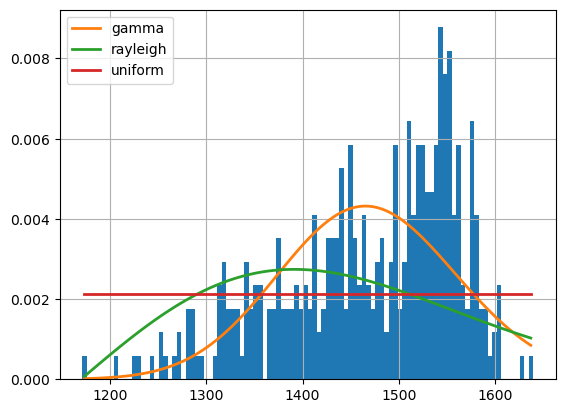

In [3]:
#Asignación(3)

#La siguiente función encuentra el modelo probabilístico de mejor ajuste
# Consumo de potencia a la hora indicada por número de carné 
def modelo_hora():
    df_modelo_hora = pd.read_csv("dt_fechaHora.csv")
    df_modelo_hora_2 = pd.read_csv("dt_fechaHora2.csv")

    df_MW = df_modelo_hora["MW"]
    df_MW_2 = df_modelo_hora_2["MW"]
    #print(df_MW)
    #generación de csv para usar en punto siguiente.
    #csv con datos de consumo de potencia de una hora los 365 días
    df_MW.to_csv("df_MW.csv", header= False, index=False)
    df_MW_2.to_csv("df_MW_2.csv", header= False, index=False)
    
    f = Fitter(df_MW, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()
    #Parámetros
    print('El modelo de distribución de consumo de potencia para las 18 horas es : ',f.get_best(method='sumsquare_error'))
    # Parámetros de ajuste
    parametros = expon.fit(df_MW)
    print('\nParámetros de modelo de ajuste: \n')
    print('loc = {:0.4f}, \nscale = {:0.4f}'.format(parametros[0], parametros[1]))

modelo_hora()

In [4]:
#Asignación(4)

# Cálculo de momentos
from numpy import dtype


def estadisticas_hora():
    #Creación de dataframe de csv de función anterior
    df_MW_365 = pd.read_csv("df_MW.csv")
    #Conversión a numparray desde el dataFrame
    numpyarray_MW_365 = df_MW_365.to_numpy()
    #print(type(numpyarray_MW_365))
    # Media de los datos
    media_d = np.mean(numpyarray_MW_365)
    # Varianza de los datos
    varianza_d = np.var(numpyarray_MW_365)
    # Varianza de los datos
    desviacion_d = np.std(numpyarray_MW_365)
    # Inclinación de los datos
    inclinacion_d = skew(numpyarray_MW_365)
    #print(type(float(inclinacion_d)))
    # Kurtosis de los datos
    curtosis_d = kurtosis(numpyarray_MW_365)

    # Imprimir resumen de datos
    print('\nSus estadísticas son: \n')
    print('Media: {:0.4f}'.format(media_d))
    print('Varianza: {:0.4f}'.format(varianza_d))
    print('Desviación estándar: {:0.4f}'.format(desviacion_d))
    print('Inclinación: {:0.4f}'.format(float(inclinacion_d)))
    print('Kurtosis: {:0.4f}'.format(float(curtosis_d)))

estadisticas_hora()


Sus estadísticas son: 

Media: 1469.9753
Varianza: 8133.9427
Desviación estándar: 90.1884
Inclinación: -0.7125
Kurtosis: -0.2142


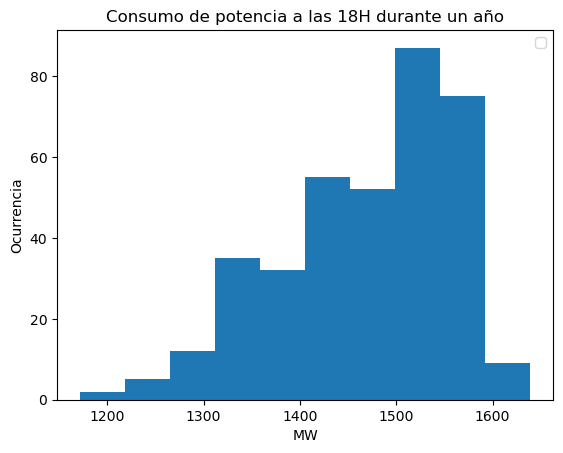

In [5]:
#Asignación(5)

# Función genera historgama de condumo de potencia de 365 días
def visualizacion_hora():
    #Creación de dataframe de csv de función anterior
    df_MW_365 = pd.read_csv("df_MW.csv")
    # Datos aleatorios y curva de ajuste
    plt.figure()
    plt.hist(df_MW_365)
    plt.plot( )
    # Información de la gráfica
    plt.title("Consumo de potencia a las 18H durante un año")
    plt.xlabel('MW')
    plt.ylabel('Ocurrencia')
    plt.legend()
    plt.show()
visualizacion_hora()

    

In [6]:
#Asignación(6)

# Función que encuentra correlación estadística entre las 18h y 03h


def correlacion_hora():
    #Creación de dataframe de csv de función anterior
    df_MW_18 = pd.read_csv("df_MW.csv")
    df_MW_3 = pd.read_csv("df_MW_2.csv")
    #print(df_MW_18)
    
    #array_18 = df_MW_18[1:].to_numpy().ravel
    #print(array_18)
    #Conversión a numparray desde el dataFrame
    numpyarray_MW_18 = df_MW_18.to_numpy()
    flat_MW_18 = np.ravel(numpyarray_MW_18)
    data_flat_MW_18 = pd.DataFrame(flat_MW_18).to_csv("dt_array_18.csv", header= False, index=False)
    list_18 = list(flat_MW_18)
    #print(list_18)
    numpyarray_MW_3 = df_MW_3.to_numpy()
    flat_MW_3 = np.ravel(numpyarray_MW_3)
    data_flat_MW_3 = pd.DataFrame(flat_MW_3).to_csv("dt_array_3.csv", header= False, index=False)
    list_3 = list(flat_MW_3)
    #print(type(flat_MW_3))



    correlacion = np.corrcoef(list_18, list_3)
    print('La matriz de correlación correspondiente es: ')
    print(correlacion)
    #print(type(correlacion))
    arraycorrelacion = correlacion[0]
    #print(arraycorrelacion)
    #print(type(arraycorrelacion))
    print('El índice de correlación de Pearson entre la distribución de las 18 y 3 horas es p= ',arraycorrelacion[1])
correlacion_hora()
    

La matriz de correlación correspondiente es: 
[[1.       0.178738]
 [0.178738 1.      ]]
El índice de correlación de Pearson entre la distribución de las 18 y 3 horas es p=  0.17873800183295246


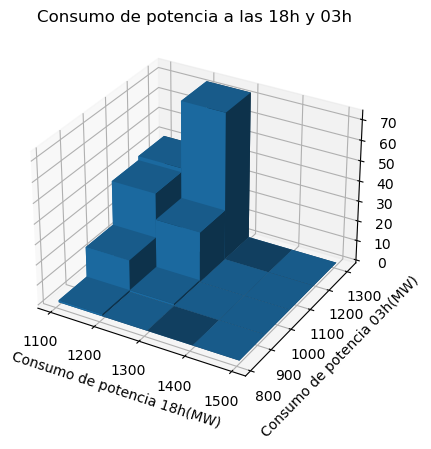

In [7]:
#Asignacion(7)

#Funcion que crea histograma 3D con datos de 18h y 03h

def visualizacion_hora():
    # Lectura dataframes
    df_array_18 = pd.read_csv("dt_array_18.csv")
    df_array_3 = pd.read_csv("dt_array_3.csv")
    # Conversión a numparray desde el dataFrame
    unflatted_x = df_array_18.to_numpy()
    unflatted_y = df_array_3.to_numpy()
    # Datos aplanados
    x = np.ravel(unflatted_x) 
    y = np.ravel(unflatted_y)
    #print(x)
    #print(type(x))
    #print(y)
    #print(type(y))

    #print(x)
    #print(type(x))
    # Create a figure for plotting the data as a 3D histogram.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=(4,4), range=[[1100, 1500], [800, 1300]])

    # Construct arrays for the anchor positions of the 16 bars.
    #xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:], indexing="ij")
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])- (xedges[1]-xedges[0])
    xpos = xpos.ravel()*1./2
    ypos = ypos.ravel()*1./2
    zpos = np.zeros_like(xpos)

    # Construct arrays with the dimensions for the 16 bars.
    #dx = dy = 85 * np.ones_like(zpos)
    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.title("Consumo de potencia a las 18h y 03h")
    plt.xlabel("Consumo de potencia 18h(MW)")
    plt.ylabel("Consumo de potencia 03h(MW)")
    plt.show()



visualizacion_hora()    

In [8]:
#Asignación(8)

#Función para calcular energía consumida por semana 

def energia_semanal():
    # Lectura dataframes
    df_horas = pd.read_csv("data.csv")
    #print(df_horas)
    #Contador inicio row
    a = 0
    #Contador final row
    A = 167
    consumo_primerasemana = df_horas.iloc[a:A, 1:2].sum()
    #print(float(consumo_primerasemana))
    with open("consumo_semanas.csv", "a+", newline='') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow([float(consumo_primerasemana)])
    while A <= 8684 :
        a += 167
        A += 167
        i = 0
        consumo_semanal = df_horas.iloc[a:A, 1:2].sum()
        #print(float(consumo_semanal))
        with open("consumo_semanas.csv", "a+", newline='') as file:
            writer = csv.writer(file, delimiter=';')
            writer.writerow([float(consumo_semanal)])

        if A == 8684:
            break


#count = 52
#for i in range(count):
#    print('var_' + str(i) + ' = ' + str(i))


energia_semanal()    

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00, 13.09it/s]


El modelo de distribución de consumo de potencia para las 18 horas es :  {'rayleigh': {'loc': 203503.61699524807, 'scale': 8639.313480304674}}

Parámetros de modelo de ajuste: 

loc = 194248.4500, 
scale = 20199.1922


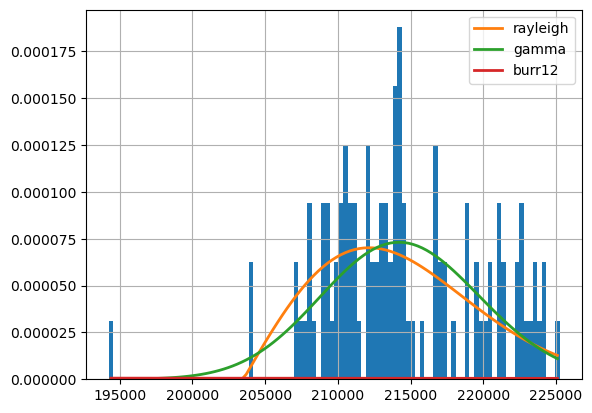

In [9]:
#Asignación(9)

#Función para encontrar modelo probabilístico y sus parámetros de mejor ajuste 
#Usando consumo por semanas
def modelo_energia_semanal():
    df_modelo_semanal = pd.read_csv("consumo_semanas.csv")

    f1 = Fitter(df_modelo_semanal, distributions=['gamma', 'rayleigh', 'burr12'])
    f1.fit()
    f1.summary()
    #Parámetros
    print('El modelo de distribución de consumo de potencia para las 18 horas es : ',f1.get_best())
    # Parámetros de ajuste
    parametros = expon.fit(df_modelo_semanal)
    print('\nParámetros de modelo de ajuste: \n')
    print('loc = {:0.4f}, \nscale = {:0.4f}'.format(parametros[0], parametros[1]))


    
modelo_energia_semanal()



22088107.150000002
Modelo de consumo anual Z es:  4027.0087173960524


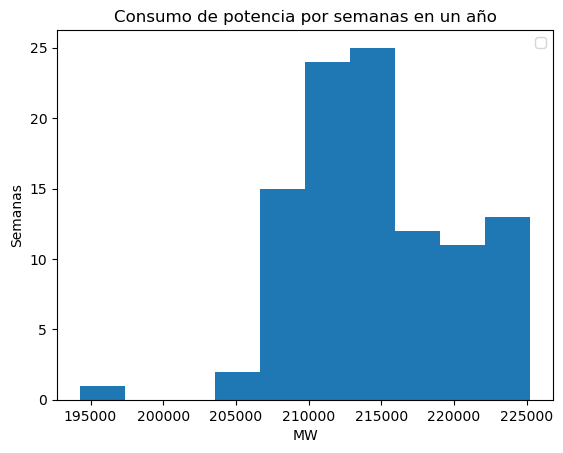

In [10]:
#Asignación(10)

#Modelo de mejor ajuste para consumo anual
def modelo_energia_anual():
    #Creación de dataframe de csv de función anterior
    df_anual = pd.read_csv("consumo_semanas.csv")
    #Conversión a numparray desde el dataFrame
    numpyarray_anual = df_anual.to_numpy()
    # Media de los datos
    media_d = np.mean(numpyarray_anual)
    # Desviación estándar de los datos
    desviacion_d = np.std(numpyarray_anual)
    #S_N
    S_N = df_anual.sum()
    print(float(S_N))
    #Consumo de energía anual
    Z = (float(S_N) - float(media_d))/(float(desviacion_d))
    print("Modelo de consumo anual Z es: ", float(Z))


    plt.figure()
    plt.hist(df_anual)
    plt.plot()
    # Información de la gráfica
    plt.title("Consumo de potencia por semanas en un año")
    plt.xlabel('MW')
    plt.ylabel('Semanas')
    plt.legend()
    plt.show()

modelo_energia_anual()
    


[2.80146922 2.97100324 2.83712004 2.26698209 3.91114133 2.82533938
 0.99166303 0.6315334  2.79079409 2.87982667 1.03097772 1.36618713
 3.87504467 2.77802839 1.86553304 2.81125078 2.0471435  3.71496548
 2.9590772  2.48975613 2.60618188 1.58723045 2.17295758 3.19959811
 2.88617891 1.18145592 0.64378352 0.82450206 0.53730155 1.92242007
 1.37008725 1.45187716 3.89167055 0.44377445 1.55305636 3.1322635
 3.89158904 1.93283842 1.34568442 2.26967614 0.19176604 1.55574812
 3.62521458 0.64407284 2.97448454 2.53189665 1.29672007 3.68950613
 0.94890575 3.29578228 3.00242856 0.45513781 3.38144498 3.69572852
 0.88334717 3.7322155  1.95599497 1.89887456 0.35666989 0.91979271
 2.86374964 1.98450465 3.06595751 3.58718929 3.08889207 3.70869715
 2.45860811 2.43625508 2.73873946 1.00405187 3.35135055 0.47446247
 3.18893897 3.79601707 0.59225151 3.62748794 3.1534933  3.07362337
 2.39398593 1.76858247 2.89215208 1.666473   0.90724158 1.81690936
 3.39177501 3.7466238  3.82414474 1.56837726 2.83329868 0.51806

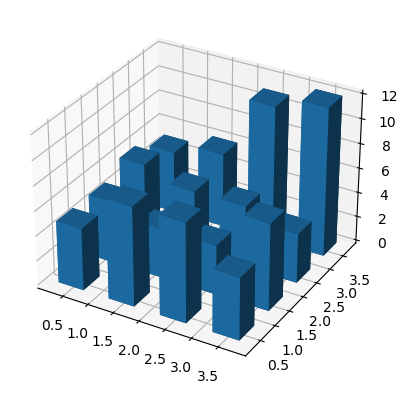

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
print(x)
print(type(x))
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [12]:
import random

def asignacion_horas(digitos):
    '''Elige una hora A en periodo punta
    y una hora B de los otros periodos,
    con los dígitos del carné como "seed"
    '''
    
    random.seed(digitos)
    punta = [11, 12, 18, 19, 20]
    valle = [7, 8, 9, 10, 13, 14, 15, 16, 17]
    nocturno = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
    otro = valle + nocturno
    hora_A = random.choice(punta)
    hora_B = random.choice(otro)
    return hora_A, hora_B

In [13]:
horas = asignacion_horas(72018)

print(f'Las horas asignadas son {horas[0]} y {horas[1]}.')

Las horas asignadas son 18 y 3.


In [14]:
help(asignacion_horas)

Help on function asignacion_horas in module __main__:

asignacion_horas(digitos)
    Elige una hora A en periodo punta
    y una hora B de los otros periodos,
    con los dígitos del carné como "seed"



         fechas  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    2020-01-23            0        0        0        0       0   
1    2020-01-24            0        0        0        0       0   
2    2020-01-25            0        0        0        0       0   
3    2020-01-26            0        0        0        0       0   
4    2020-01-27            0        0        0        0       0   
..          ...          ...      ...      ...      ...     ...   
399  2021-02-25           16      986      161       24      55   
400  2021-02-26           16      916      183       23      64   
401  2021-02-27           11      986      155       27      23   
402  2021-02-28            7      952      132       17      25   
403  2021-03-01           19      764      163       23      47   

     Antigua.and.Barbuda  Argentina  Armenia  Australia  ...  Uruguay     US  \
0                      0          0        0          0  ...        0      0   
1                      0          0

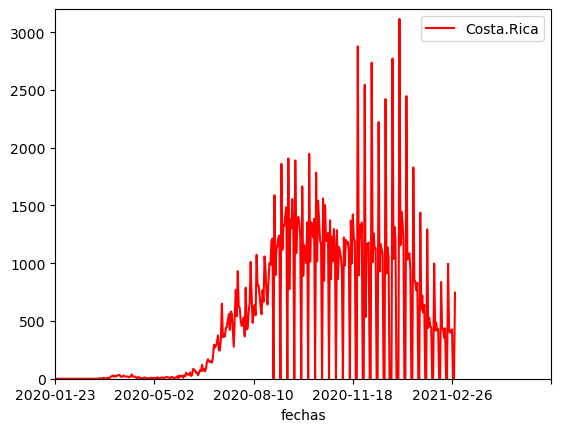

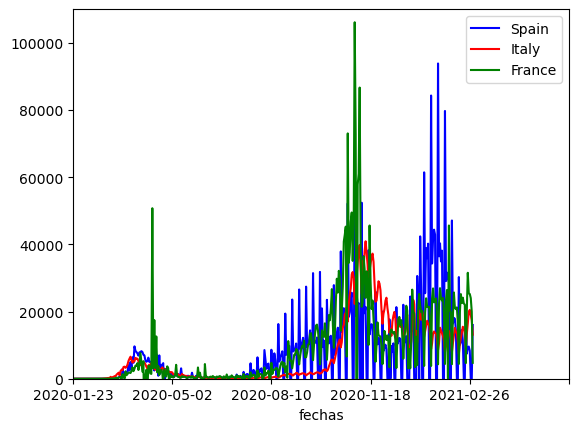

In [36]:
from numpy import sort
import numpy
from tomlkit import value
import numpy as np
from statistics import median
import pandas as pd



#Función que se encarga de mezclar valores del diccionario y de la lista
def list_dic(a,b):
    list1_dicvalues = list(b.values()) #Se crea una variable que es una lista con los valores de b
    list2_sumval = sort(a + list1_dicvalues)    #Comando sort ordena de menor a mayor
    print("La lista creada con los valores del diccionario y lista es: ", list2_sumval)

    #Cálculo de medias
    media_dv = np.mean(numpy.array(list1_dicvalues))
    media_lista = np.mean(numpy.array(a))
    print("La media de los valores de diccionario es: ", media_dv)
    print("La media de los valores de la lista es: ", media_lista)
    
    #Cálculo de desviaciones estandar
    desviacion_dv = np.std(numpy.array(list1_dicvalues))
    desviacion_a = np.std(numpy.array(a))
    print("La desviación estándar de los valores de diccionario es: ", desviacion_dv)
    print("La desviación estándar de los valores de la lista es: ", desviacion_a)

    #Cálculo de medianas
    mediana_dv = median(list1_dicvalues)
    mediana_a = median(a)
    print("La mediana de los valores de diccionario es: ", mediana_dv)
    print("La mediana de los valores de diccionario es: ", mediana_a)


    #Creación de diccionario con keys de b y valores de lista a
    indice = b.keys()   #Keys del diccionario brindado
    diccionario_bk_a = dict(zip(indice, a)) #Se utiliza el comando "zip" para agrupar indice y valor
    print("El diccionario que contiene los keys y valores de lista es: ", diccionario_bk_a)
    
 


d = {0:20,1:320,2:90,3:147,4:122,5:717,6:2,7:77,8:112,9:14,10:17,11:24}
list1 = [13,2,104,36,9,120,29,500,89,41,65,7 ]
#list_dic(list1, d)
#//______________________________________________________________________________________________________

def diccionario_to_dataframe(a):
    #Conversión de diccionario a dataFrame
    df = pd.DataFrame(a, index =["est1", "est2", "est3", "est4", "est5", "est6", "est7" ])
    print("El diccionario introducido se convierte a tabla(dataframe)")
    print(df)

    #Conversión de diccionario a dataFrame con indice binario
    df_bi = pd.DataFrame(a, index =[0, 1, 2, 3, 4, 5, 6 ])
    print("El diccionario introducido se convierte a tabla(dataframe)")
    #print(df_bi)

    #Ordenar alfabéticamente ascendente A-Z por nombre
    print("Tabla ordenada por nombre ascendentemente")
    #print(df.sort_values('nombre'))

    #Ordenar alfabéticamente descendiente Z-A por ciudad
    print("Tabla ordenada por carrera descendientemente")
    #print(df.sort_values('carrera', ascending=False))

    #Visualización usando índice binario primer estudiante
    print("Visualizando el primer estudiante por medio del índice binario [0]")
    print(df_bi.loc[0])

    #Visualización usando índice binario segundo estudiante
    print("Visualizando el segundo estudiante por medio del índice binario [1]")
    print(df_bi.loc[1])

    #Visualización usando índice binario tercer estudiante
    print("Visualizando el tercer estudiante por medio del índice binario [2]")
    print(df_bi.loc[2])

    #Visualización usando índice binario cuarto estudiante
    print("Visualizando el cuarto estudiante por medio del índice binario [3]")
    print(df_bi.loc[3])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est1]")
    print(df.loc["est1"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est2]")
    print(df.loc["est2"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est3]")
    print(df.loc["est3"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est4]")
    print(df.loc["est4"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est5]")
    print(df.loc["est5"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est6]")
    print(df.loc["est6"])

    #Visualización usando indice textual primer estudiante 
    print("Visualizando el primer estudiante por medio del índice textual [est7]")
    print(df.loc["est7"])

    #Visualización de estudiantes indice binario 3 solamente datos y carrera 
    print("Visualización de estudiantes indice binario [3] solamente datos y carrera")
    print(df_bi.loc[3, "carrera"])
    
    #Visualización de estudiantes indice binario 3 solamente datos y carrera 
    print(df_bi.loc[3, "Edad"])


    #Visualización de estudiantes indice binario 4 solamente datos y carrera 
    print("Visualización de estudiantes indice binario [4] solamente datos y carrera")
    print(df_bi.loc[4, "carrera"])

    #Visualización de estudiantes indice binario 4 solamente datos y carrera 
    print(df_bi.loc[4, "Edad"])

    #Visualización de estudiantes indice binario 5 solamente datos y carrera 
    print("Visualización de estudiantes indice binario [5] solamente datos y carrera")
    print(df_bi.loc[5, "carrera"])

    #Visualización de estudiantes indice binario 5 solamente datos y carrera 
    print(df_bi.loc[5, "Edad"])

    #Exportar a excel 
    print("Exportando dataframe a excel...")
    file_name = "Dataframe.xlsx"
    df.to_excel(file_name)
    print("El dataframe se escribió en un archivo de excel de forma exitosa")

data = {'nombre': ["Marco","Francisco","Roberto","Mariel","Sonia","John","Charles"],
         'carrera': ["Ing. Eléctrica","Educacion Física","Matemáticas","Ing. Mecánica","Derecho","Idiiomas","Ing. Civil"],
         'Edad': [21,20,19,29,22,21,22]
         }

#diccionario_to_dataframe(data)
#//________________________________________________________________________________________________

def  CargarArchivo():
    import datetime
    from datetime import timedelta, date
    import matplotlib.pyplot as plt
    

    # Función solicitada para definir columnas como índices
        # Completamente innecesaria porque sirve .set_idex por si solo y hasta se ve mejor
    def ChangeIndex(a):
        a.set_index('fechas', inplace=True)
        a.to_csv("dataframe_index_fechas.csv", header= True, index=True)

    #Cargar CSV a dataframe
    df = pd.read_csv("time_series_covid19_confirmed_ready.csv")

    # Cambiar indice por medio de función
    ChangeIndex(df)

    # Dataframe generado apartir de función ChangeIndex
    df_f = pd.read_csv("dataframe_index_fechas.csv")
    #df_f.set_index('fechas', inplace=True)
    print(df_f)

    # Panama, Uruguay, Costa Rica y España del 01/09/2020 al 25/09/2020

    a = "2020-09-01"
    Panama = df_f[["fechas","Panama"]]
    Uruguay = df_f[["fechas","Uruguay"]]
    Costa_Rica = df_f[["fechas","Costa.Rica"]]
    España = df_f[["fechas","Spain"]]
    
    # Contador para creación de dataframes 
    cont = 1

    # Creo DataFrame con primer valor

        #Panama
    dt_primera_fecha_Panama = Panama[Panama["fechas"] == a]
    dt_primera_fecha_Panama.to_csv("fechas_casos_Panama.csv", index=False)

        #Uruguay
    dt_primera_fecha_Uruguay = Uruguay[Uruguay["fechas"] == a]
    dt_primera_fecha_Uruguay.to_csv("fechas_casos_Uruguay.csv", index=False)

        #Costa Rica
    dt_primera_fecha_CostaRica = Costa_Rica[Costa_Rica["fechas"] == a]
    dt_primera_fecha_CostaRica.to_csv("fechas_casos_CostaRica.csv", index=False)

        #España
    dt_primera_fecha_España = España[España["fechas"] == a]
    dt_primera_fecha_España.to_csv("fechas_casos_Espana.csv", index=False)

    # Objeto de inicio y formato de fecha
    out = datetime.datetime.strptime(a, "%Y-%m-%d")

    # Ciclo generador de fechas
    while cont <= 24:

        #Generador de fechas por ciclo
        out_plus = out + timedelta(cont)
        fechas = out_plus.strftime("%Y-%m-%d")
 
        #Panama
        dt_fechas_Panama = Panama[Panama["fechas"] == fechas]
        dt_fechas_Panama.to_csv("fechas_casos_Panama.csv", mode='a', header=False, index = False)

        #Uruguay
        dt_fechas_Uruguay = Uruguay[Uruguay["fechas"] == fechas]
        dt_fechas_Uruguay.to_csv("fechas_casos_Uruguay.csv", mode='a', header=False, index = False)

        #Costa Rica
        dt_fechas_CostaRica = Costa_Rica[Costa_Rica["fechas"] == fechas]
        dt_fechas_CostaRica.to_csv("fechas_casos_CostaRica.csv", mode='a', header=False, index = False)       

        #España
        dt_fechas_España = España[España["fechas"] == fechas]
        dt_fechas_España.to_csv("fechas_casos_Espana.csv", mode='a', header=False, index = False)              


        cont += 1
        if cont == 24:
            break
    
    
    #Datos de paises
        
        #Panama
    Setiembre_Panama = pd.read_csv("fechas_casos_Panama.csv")
    #Setiembre_Panama.set_index('fechas', inplace=True)
    print(Setiembre_Panama)

        #Uruguay
    Setiembre_Uruguay = pd.read_csv("fechas_casos_Uruguay.csv")
    #Setiembre_Uruguay.set_index('fechas', inplace=True) 
    print(Setiembre_Uruguay)  

        #Costa Rica
    Setiembre_CostaRica = pd.read_csv("fechas_casos_CostaRica.csv")
    #Setiembre_CostaRica.set_index('fechas', inplace=True) 
    print(Setiembre_CostaRica) 

        #España
    Setiembre_España = pd.read_csv("fechas_casos_Espana.csv")
    #Setiembre_España.set_index('fechas', inplace=True) 
    print(Setiembre_España)  

    # Gráfico de trazo fijo para Costa Rica 
    
    # Obtener eje
    ax = plt.gca()
    # Se especifica dentro de los parámetos el tipo del gráfico, sus ejes y color
    ax.set_xlim([0, 500])
    ax.set_ylim([0, 3200])
    df_f.plot(kind='line',x='fechas',y='Costa.Rica',color='red', ax = ax)
    plt.show()

    #Gráfico de trazo fijo para España, Italia y Francia
    # Obtener eje
    ax = plt.gca()
    # Se especifica dentro de los parámetos el tipo del gráfico, sus ejes y color
    ax.set_xlim([0, 500])
    ax.set_ylim([0, 110000])
    df_f.plot(kind='line',x='fechas',y='Spain',color='blue', ax = ax)
    df_f.plot(kind='line',x='fechas',y='Italy',color='red', ax = ax)
    df_f.plot(kind='line',x='fechas',y='France',color='green', ax = ax)   
    plt.show()    

    

CargarArchivo()




---
**Forma de entrega**

- Este proyecto se entrega como un archivo `[carné].py`, el cual deberá ser posible de ejecutar y mostrar los resultados sin problemas en una instalación regular de Anaconda (si son necesarios algunos paquetes nuevos, favor indicarlo).
- La documentación de lo realizado será dentro del mismo código, en la forma de [docstrings](https://peps.python.org/pep-0257/) (con más referencias al final de este documento).

> "Code is more often read than written." (*Guido van Rossum*)

### Referencias

- [Documenting Python Code: A Complete Guide](https://realpython.com/documenting-python-code/)
- [Google Python Style Guide: 3.8 Comments and Docstrings](https://google.github.io/styleguide/pyguide.html#38-comments-and-docstrings)
- [pandas docstring guide](https://pandas.pydata.org/docs/development/contributing_docstring.html)
- [Programiz Python Docstrings](https://www.programiz.com/python-programming/docstrings)

**Notas sobre la presentación**

Es necesario: 

- Documentación rigurosa de la teoría utilizada para la resolución de los problemas. Por ejemplo: deben estar especificadas las fórmulas, reglas, desarrollos aritméticos u otra teoría utilizada en la programación. Esto se hace en la parte escrita del reporte del proyecto.
- En el caso de un reporte escrito (LaTeX u otro), también incluir los fragmentos de código que resuelven cada parte de las asignaciones.
- Comentarios exhaustivos dentro del código fuente del programa desarrollado. Generalmente, cada línea con una funcionalidad o acción distinta dentro del código debe ser explicada. Por ejemplo: la declaración de nuevas variables.
- Todas las gráficas deben tener ejes señalizados con el nombre de la variable y sus unidades.
- Estricto apego a [PEP 8](https://www.python.org/dev/peps/pep-0008/) - *Style Guide for Python Code*, que define convenciones de escritura de la sintaxis de Python.
- Ortografía perfecta o, al menos, depurada. La ortografía será revisada tanto en la parte escrita como dentro del código en los comentarios. Nota: para el código fuente, Python utiliza por defecto la codificación UTF-8, que admite todos los signos de puntuación (y hasta emojis), de forma que no hay ninguna excusa para no escribir correctamente los comentarios con mayúsculas y tildes, etc. Ejemplo:

```python
# ¡Este es un comentario de una línea!
N = 500
```

- Cuando se utilice Markdown o LaTeX, debe utilizarse la estructura para dar formato al texto. Por ejemplo: títulos, listas, fragmentos de código, citas textuales y todos los demás elementos.
- Cuando se utilice *docstrings*, debe utilizarse PEP-257 y alguna de las otras guías de estilo disponibles (Pandas, NumPy, Google, etc.).


---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---